<center>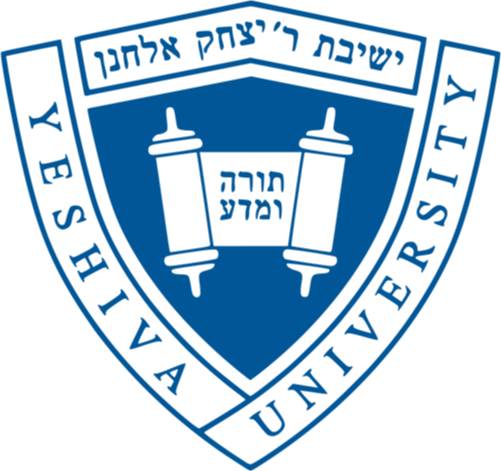</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5011 Natural Language Processing</h1>
<p>
<h2 style='text-align: center;'>Teachback Assignment: Teach back on an NLP Topic</h1>
<br><br>
<h2 style='text-align: center;'>Emotion Detection in NLP</h1>
<h2 style='text-align: center;'>Practical Example with ML</h1>
<br><br>

<div style="display: flex; justify-content: center;">
    <table style="border-collapse: collapse; border: 0;">
        <tr>
            <!-- <td style="text-align:center; vertical-align:middle; padding:10px 40px 10px 10px; border: 0;">
                <h3 style="margin: 0;"></h3>
            </td> -->
            <td style="text-align:center; vertical-align:middle; padding:10px 10px 10px 40px; border: 0;">
                <h3 style="margin: 0;">Radek Jan Holik</h3>
            </td>
        </tr>
    </table>
</div>
<br>
<br>
<br>

# __Package Import__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# __Load Data__

### Emotions dataset for NLP https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?resource=download

In [2]:
data = pd.read_csv('data_emotion.txt', sep = ';', names = ['Text', 'Emotion'])

In [3]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
# Separate the features and labels
X = data['Text']
y = data['Emotion']

# __Split Data__

In [5]:
X_train_text, X_val_text, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 2023, stratify = y)

### __Train Data__

In [6]:
print(f"Train samples : {len(y_train):,}")

Train samples : 16,000


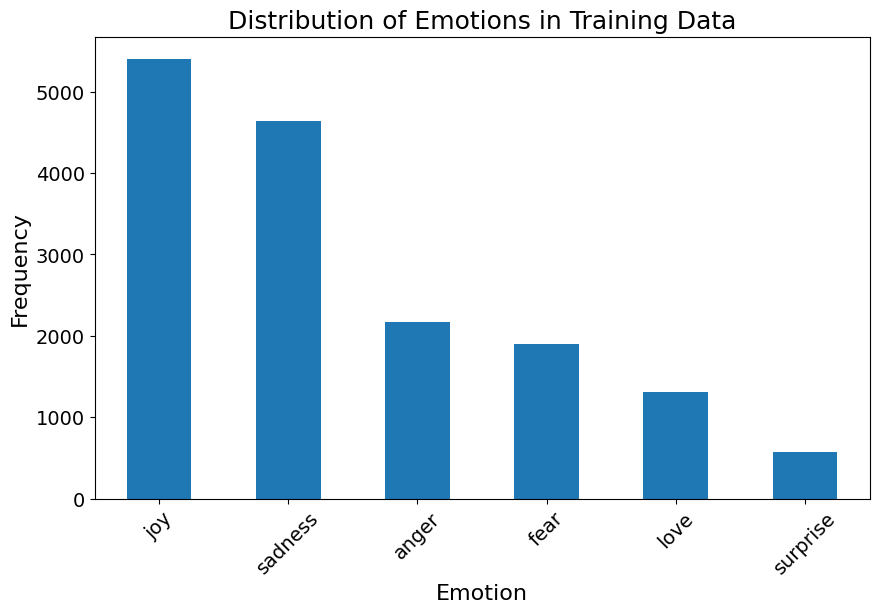

In [7]:
emotion_train_distribution = y_train.value_counts()

plt.figure(figsize = (10,6))
emotion_train_distribution.plot(kind = 'bar')
plt.title('Distribution of Emotions in Training Data', fontsize = 18)
plt.xlabel('Emotion', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)
plt.show()

### __Validation Data__

In [8]:
print(f"Validation samples : {len(y_val):,}")

Validation samples : 4,000


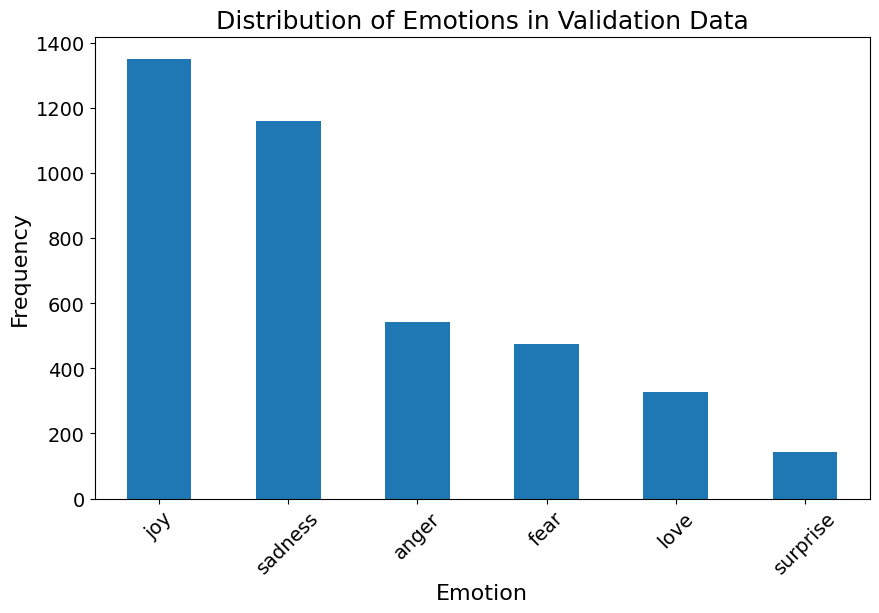

In [9]:
emotion_val_distribution = y_val.value_counts()

plt.figure(figsize = (10,6))
emotion_val_distribution.plot(kind = 'bar')
plt.title('Distribution of Emotions in Validation Data', fontsize = 18)
plt.xlabel('Emotion', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)
plt.show()

# __Preprocess Data__

In [10]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

# __Train and Evaluate Models__

### __Naive Bayes__

In [11]:
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_val)

In [12]:
print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_score(y_val, nb_predictions):.3f}")
print(f"F1 Score for Naive Bayes: {f1_score(y_val, nb_predictions, average = 'weighted'):.3f}")

Naive Bayes Classifier:
Accuracy: 0.758
F1 Score for Naive Bayes: 0.726


### __SVM__

In [13]:
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_val)

In [14]:
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_val, svm_predictions):.3f}")
print(f"F1 Score for SVM: {f1_score(y_val, svm_predictions, average = 'weighted'):.3f}")

SVM Classifier:
Accuracy: 0.877
F1 Score for SVM: 0.877


### __Decision Tree__

In [15]:
dt_model = DecisionTreeClassifier(random_state = 2023)

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_val)

In [16]:
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_val, dt_predictions):.3f}")
print(f"F1 Score for Decision Trees: {f1_score(y_val, dt_predictions, average = 'weighted'):.3f}")

Decision Tree Classifier:
Accuracy: 0.864
F1 Score for Decision Trees: 0.865


### __Result Comparison__

In [17]:
# Getting predictions for 20 examples from validation data
prediction_nb_20 = nb_model.predict(X_val[:20])
prediction_svm_20 = svm_model.predict(X_val[:20])
prediction_dt_20 = dt_model.predict(X_val[:20])

In [18]:
# Creating a DataFrame to display the results
result_df = pd.DataFrame({
    'Text': X_val_text[:20],
    'Emotion': y_val[:20],
    'Prediction_NB': prediction_nb_20,
    'Prediction_SVM': prediction_svm_20,
    'Prediction_DT': prediction_dt_20
})

result_df

,Text,Emotion,Prediction_NB,Prediction_SVM,Prediction_DT
17229,i can t help but feel amazed,surprise,joy,surprise,surprise
19772,i have this grave feeling it will not be back ...,joy,joy,joy,love
18596,i go through my day feeling your movements and...,surprise,joy,surprise,surprise
17711,i still had the feeling something weird had ju...,surprise,fear,fear,fear
3375,i am waiting for a feeling that special feelin...,joy,joy,joy,joy
8130,i understand where they are coming from and wh...,joy,joy,joy,joy
1130,i still want to be a lady who likes ladies who...,sadness,sadness,sadness,sadness
6,ive been taking or milligrams or times recomme...,surprise,sadness,sadness,surprise
18826,i ate something wrong so i feel terrible all day,sadness,sadness,sadness,sadness
14724,im so excited but at the same time i feel a li...,fear,joy,fear,joy
